In [1]:
import requests

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "4c45b510edmsh50b6e31b93be889p1ae7adjsn575de8df18c3"
    }

response = requests.request("GET", url, headers=headers)


data =response.json()



In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# For time stamps
from datetime import datetime



In [3]:
country_list = data['response']


In [4]:
print(country_list[1]['cases']['new'])
print(len(country_list))

+1739
224


In [5]:
country_stat =[]
for i in range(0,len(country_list)):
    country_stat.append([country_list[i]['country'],country_list[i]['cases']['new'],country_list[i]['cases']['active'],country_list[i]['cases']['critical'],country_list[i]['cases']['recovered'],
                       country_list[i]['cases']['total'],country_list[i]['deaths']['new'],country_list[i]['deaths']['total'],country_list[i]['tests']['total'],
                        country_list[i]['day'],country_list[i]['time']])
    

In [6]:
covid_df = pd.DataFrame(country_stat)

In [7]:
covid_df

,0,1,2,3,4,5,6,7,8,9,10
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T19:15:05+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T19:15:04+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T19:15:04+00:00
3,USA,+13281,806690,14175,137465,1000441,+873,56286,5632340.0,2020-04-27,2020-04-27T19:15:04+00:00
4,Germany,+443,37692,2570,114500,158213,+45,6021,2072669.0,2020-04-27,2020-04-27T19:15:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...
219,South-America,+2227,83418,9752,50345,140147,+95,6384,NaN,2020-04-27,2020-04-27T19:15:04+00:00
220,Oceania,+4,1350,46,6838,8290,+1,102,NaN,2020-04-27,2020-04-27T19:15:04+00:00
221,Africa,+844,21662,140,10379,33501,+33,1460,NaN,2020-04-27,2020-04-27T19:15:04+00:00
222,Diamond-Princess,None,54,4,645,712,None,13,NaN,2020-04-27,2020-04-27T19:15:04+00:00


In [9]:
covid_df.columns=['country','new_cases','active_cases','critical_cases','recovered_cases','total_cases','new_deaths','total_deaths','total_test','day','time']

In [10]:
covid_df.head()

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T19:15:05+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T19:15:04+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T19:15:04+00:00
3,USA,+13281,806690,14175,137465,1000441,+873,56286,5632340.0,2020-04-27,2020-04-27T19:15:04+00:00
4,Germany,+443,37692,2570,114500,158213,+45,6021,2072669.0,2020-04-27,2020-04-27T19:15:04+00:00


In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
country            224 non-null object
new_cases          174 non-null object
active_cases       224 non-null int64
critical_cases     224 non-null int64
recovered_cases    224 non-null int64
total_cases        224 non-null int64
new_deaths         100 non-null object
total_deaths       224 non-null int64
total_test         173 non-null float64
day                224 non-null object
time               224 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 19.4+ KB


In [12]:
covid_df.sort_values('total_cases', ascending=False)

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
189,All,+52559,1919075,56427,916367,3045821,+3464,210379,NaN,2020-04-27,2020-04-27T19:15:04+00:00
217,Europe,+23854,730809,25070,445987,1300662,+1981,123866,NaN,2020-04-27,2020-04-27T19:15:04+00:00
216,North-America,+16005,852852,15438,166724,1080608,+1077,61032,NaN,2020-04-27,2020-04-27T19:15:04+00:00
3,USA,+13281,806690,14175,137465,1000441,+873,56286,5632340.0,2020-04-27,2020-04-27T19:15:04+00:00
218,Asia,+9625,228923,5977,235449,481892,+277,17520,NaN,2020-04-27,2020-04-27T19:15:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean-Netherlands,+2,5,0,0,5,None,0,110.0,2020-04-27,2020-04-27T19:15:05+00:00
215,Sao-Tome-and-Principe,+4,4,0,0,4,None,0,19.0,2020-04-27,2020-04-27T19:15:05+00:00
203,Anguilla,None,0,0,3,3,None,0,NaN,2020-04-27,2020-04-27T19:15:05+00:00
214,Saint-Pierre-Miquelon,+1,1,0,0,1,None,0,NaN,2020-04-27,2020-04-27T19:15:05+00:00


In [13]:
covid_df

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T19:15:05+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T19:15:04+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T19:15:04+00:00
3,USA,+13281,806690,14175,137465,1000441,+873,56286,5632340.0,2020-04-27,2020-04-27T19:15:04+00:00
4,Germany,+443,37692,2570,114500,158213,+45,6021,2072669.0,2020-04-27,2020-04-27T19:15:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...
219,South-America,+2227,83418,9752,50345,140147,+95,6384,NaN,2020-04-27,2020-04-27T19:15:04+00:00
220,Oceania,+4,1350,46,6838,8290,+1,102,NaN,2020-04-27,2020-04-27T19:15:04+00:00
221,Africa,+844,21662,140,10379,33501,+33,1460,NaN,2020-04-27,2020-04-27T19:15:04+00:00
222,Diamond-Princess,None,54,4,645,712,None,13,NaN,2020-04-27,2020-04-27T19:15:04+00:00


In [14]:
covid_df['country']

0                 China
1                 Italy
2                 Spain
3                   USA
4               Germany
             ...       
219       South-America
220             Oceania
221              Africa
222    Diamond-Princess
223               Yemen
Name: country, Length: 224, dtype: object

In [15]:
new_df =covid_df[ covid_df['total_cases']>100000]

In [16]:
new_df

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T19:15:04+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T19:15:04+00:00
3,USA,+13281,806690,14175,137465,1000441,+873,56286,5632340.0,2020-04-27,2020-04-27T19:15:04+00:00
4,Germany,+443,37692,2570,114500,158213,+45,6021,2072669.0,2020-04-27,2020-04-27T19:15:04+00:00
6,France,+3742,97036,4608,45513,165842,+437,23293,463662.0,2020-04-27,2020-04-27T19:15:04+00:00
9,UK,+4309,135713,1559,0,157149,+360,21092,719910.0,2020-04-27,2020-04-27T19:15:04+00:00
23,Turkey,+2131,75570,1736,33791,112261,+95,2900,918885.0,2020-04-27,2020-04-27T19:15:04+00:00
189,All,+52559,1919075,56427,916367,3045821,+3464,210379,NaN,2020-04-27,2020-04-27T19:15:04+00:00
216,North-America,+16005,852852,15438,166724,1080608,+1077,61032,NaN,2020-04-27,2020-04-27T19:15:04+00:00
217,Europe,+23854,730809,25070,445987,1300662,+1981,123866,NaN,2020-04-27,2020-04-27T19:15:04+00:00


In [ ]:
sns.scatterplot(data=n)

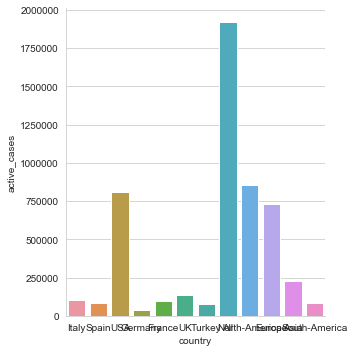

In [17]:
sns.catplot(x="country",y="active_cases",kind='bar',data=new_df )

In [ ]:
covid_df.plot(x='year', y='unemployment')

In [7]:
covid_data = pd.read_csv('https://learn.sharpsightlabs.com/datasets/covid19/covid_data_2020-04-09.csv'
                         ,sep = ";"
                         )
covid_data = covid_data.assign(date = pd.to_datetime(covid_data.date, format='%Y-%m-%d'))
covid_data = covid_data.fillna(value = {'subregion':''})

In [8]:
covid_data

,country,subregion,date,lat,long,confirmed,dead,recovered,new_cases
0,Afghanistan,,2020-01-22,33.0,65.0,0,0,0.0,NaN
1,Afghanistan,,2020-01-23,33.0,65.0,0,0,0.0,0.0
2,Afghanistan,,2020-01-24,33.0,65.0,0,0,0.0,0.0
3,Afghanistan,,2020-01-25,33.0,65.0,0,0,0.0,0.0
4,Afghanistan,,2020-01-26,33.0,65.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20772,Zimbabwe,,2020-04-05,-20.0,30.0,9,1,0.0,0.0
20773,Zimbabwe,,2020-04-06,-20.0,30.0,10,1,0.0,1.0
20774,Zimbabwe,,2020-04-07,-20.0,30.0,11,2,0.0,1.0
20775,Zimbabwe,,2020-04-08,-20.0,30.0,11,3,0.0,0.0


In [9]:
covid_data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [11]:
covid_data_NP = (covid_data
                 .query('country == "Nepal"')
                 )

In [12]:
covid_data_NP

,country,subregion,date,lat,long,confirmed,dead,recovered,new_cases
14536,Nepal,,2020-01-22,28.1667,84.25,0,0,0.0,NaN
14537,Nepal,,2020-01-23,28.1667,84.25,0,0,0.0,0.0
14538,Nepal,,2020-01-24,28.1667,84.25,0,0,0.0,0.0
14539,Nepal,,2020-01-25,28.1667,84.25,1,0,0.0,1.0
14540,Nepal,,2020-01-26,28.1667,84.25,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14610,Nepal,,2020-04-05,28.1667,84.25,9,0,1.0,0.0
14611,Nepal,,2020-04-06,28.1667,84.25,9,0,1.0,0.0
14612,Nepal,,2020-04-07,28.1667,84.25,9,0,1.0,0.0
14613,Nepal,,2020-04-08,28.1667,84.25,9,0,1.0,0.0


Text(0.5, 1.0, 'Covid-19 daily new cases\nin Nepal')

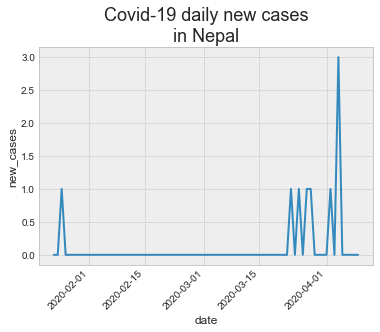

In [14]:
plt.style.use('bmh')
sns.lineplot(data = covid_data_US,x = 'date',y = 'new_cases' )

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Covid-19 daily new cases\nin Nepal', fontsize = 18)

In [15]:
#Getting Raw data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_data_RAW = pd.read_csv(url)

In [16]:
covid_data_RAW.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [38]:
# Renaming the columns

def covid_rename_columns(input_data):
    output_data = input_data.rename(
                              columns = {'Province/State':'subregion'
                                         ,'Country/Region':'country'
                                         ,'Lat':'lat'
                                         ,'Long':'long'
                                         }
                              )
    return(output_data)

# Reshaping data

def covid_melt_data(input_data, value_var_name):
    output_data = input_data.melt(id_vars = ['country','subregion','lat','long']
                                  ,var_name = 'date_RAW'
                                  ,value_name = value_var_name
                                  )
    return(output_data)

# CHanging date format

def covid_convert_dates(input_data):
    output_data = input_data.assign(
         date = pd.to_datetime(input_data.date_RAW, format='%m/%d/%y')
         )
    output_data.drop(columns = ['date_RAW'], inplace = True)
    return(output_data)

#Arranging data

def covid_rearrange_data(input_data,value_var_name):
    output_data = (input_data
                   .filter(['country', 'subregion', 'date', 'lat', 'long', value_var_name])
                   .sort_values(['country','subregion','date','lat','long'])
                   .reset_index(drop = True)
                   )
    return(output_data)

# filling with NAN

def covid_fill_missing(input_data):
    output_data = input_data.fillna(value = {'subregion':''})
    return(output_data)

In [39]:
# COmbining above function

def covid_get_data(input_url, value_var_name):
    covid_data_inprocess = pd.read_csv(input_url)
    covid_data_inprocess = covid_rename_columns(covid_data_inprocess)
    covid_data_inprocess = covid_fill_missing(covid_data_inprocess)
    covid_data_inprocess = covid_melt_data(covid_data_inprocess,value_var_name)
    covid_data_inprocess = covid_convert_dates(covid_data_inprocess)
    covid_data_inprocess = covid_rearrange_data(covid_data_inprocess, value_var_name)
    return(covid_data_inprocess)

In [40]:
#Getting data and passing through the functions

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


covid_confirmed = covid_get_data(url_confirmed,'confirmed')
covid_deaths = covid_get_data(url_deaths,'dead')
covid_recovered = covid_get_data(url_recovered,'recovered')

In [41]:
covid_confirmed.head()

,country,subregion,date,lat,long,confirmed
0,Afghanistan,,2020-01-22,33.0,65.0,0
1,Afghanistan,,2020-01-23,33.0,65.0,0
2,Afghanistan,,2020-01-24,33.0,65.0,0
3,Afghanistan,,2020-01-25,33.0,65.0,0
4,Afghanistan,,2020-01-26,33.0,65.0,0


In [44]:
len(covid_confirmed) 


26136

In [45]:
len(covid_deaths)   


26136

In [46]:
len(covid_recovered) 

24750

In [47]:
covid_deaths.drop(columns = ['lat','long'], inplace = True)
covid_recovered.drop(columns = ['lat','long'], inplace = True)

In [48]:
covid_data = (covid_confirmed
                .merge(covid_deaths, on = ['country','subregion','date'], how = 'left')
                .merge(covid_recovered, on = ['country','subregion','date'], how = 'left')
             )

In [51]:
covid_data.head()

,country,subregion,date,lat,long,confirmed,dead,recovered
0,Afghanistan,,2020-01-22,33.0,65.0,0,0,0.0
1,Afghanistan,,2020-01-23,33.0,65.0,0,0,0.0
2,Afghanistan,,2020-01-24,33.0,65.0,0,0,0.0
3,Afghanistan,,2020-01-25,33.0,65.0,0,0,0.0
4,Afghanistan,,2020-01-26,33.0,65.0,0,0,0.0


In [52]:
new_cases_ALL = (covid_data
 .sort_values(by = ['country', 'subregion', 'date'])
 .filter(['country','subregion','date','confirmed'])
 .groupby(['country','subregion'])
 .confirmed
 .diff()
)

In [54]:
covid_data = covid_data.assign(new_cases = new_cases_ALL)

In [55]:
covid_data

,country,subregion,date,lat,long,confirmed,dead,recovered,new_cases
0,Afghanistan,,2020-01-22,33.0,65.0,0,0,0.0,NaN
1,Afghanistan,,2020-01-23,33.0,65.0,0,0,0.0,0.0
2,Afghanistan,,2020-01-24,33.0,65.0,0,0,0.0,0.0
3,Afghanistan,,2020-01-25,33.0,65.0,0,0,0.0,0.0
4,Afghanistan,,2020-01-26,33.0,65.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26131,Zimbabwe,,2020-04-25,-20.0,30.0,31,4,2.0,2.0
26132,Zimbabwe,,2020-04-26,-20.0,30.0,31,4,2.0,0.0
26133,Zimbabwe,,2020-04-27,-20.0,30.0,32,4,5.0,1.0
26134,Zimbabwe,,2020-04-28,-20.0,30.0,32,4,5.0,0.0


In [56]:
pd.set_option('display.max_rows', 180)
(covid_data
    .filter(['country'])
    .drop_duplicates()
)

,country
0,Afghanistan
99,Albania
198,Algeria
297,Andorra
396,Angola
...,...
25641,West Bank and Gaza
25740,Western Sahara
25839,Yemen
25938,Zambia


In [58]:
(covid_data
 .filter(['confirmed','dead','recovered'])
 .describe()
)

,confirmed,dead,recovered
count,2.613600e+04,26136.000000,24651.000000
mean,2.697374e+03,169.892524,738.654010
std,2.600100e+04,1767.421257,5939.709394
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,7.000000e+00,0.000000,0.000000
75%,2.092500e+02,2.000000,40.000000
max,1.039909e+06,60967.000000,132929.000000


In [59]:
(covid_data
 .isnull()
 .sum()
)

country         0
subregion       0
date            0
lat             0
long            0
confirmed       0
dead            0
recovered    1485
new_cases     264
dtype: int64

In [66]:
pd.set_option('display.max_rows', 300)
(covid_data
   .filter(['country','date','confirmed','dead','recovered'])
   .groupby(['country','date'])
   .agg('sum')
   .query('date == "2020-04-27"')
   .query('country in ["US","Italy","France","China"]')
)

,,confirmed,dead,recovered
country,date,,,
China,2020-04-27,83918,4637,78374.0
France,2020-04-27,165963,23327,46293.0
Italy,2020-04-27,199414,26977,66624.0
US,2020-04-27,988197,56259,111424.0


In [69]:
covid_data_APR29 = (covid_data
                        .query('date == "2020-04-29"')
                        .filter(['country','confirmed','dead','recovered'])
                        .groupby('country')
                        .agg('sum')
                        .sort_values('confirmed', ascending = False)
                        .reset_index()
)

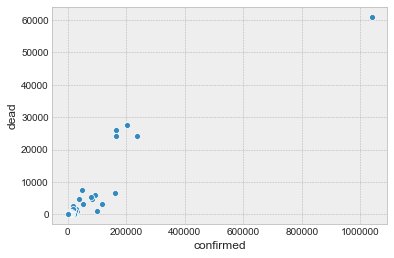

In [71]:
sns.scatterplot(data = covid_data_APR29,x = 'confirmed',y = 'dead')

Text(0.5, 1.0, 'Covid-19 daily total cases as of 29th April')

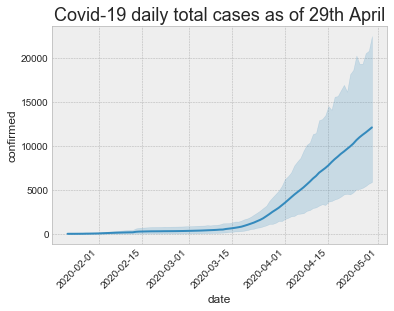

In [89]:
plt.style.use('bmh')
sns.lineplot(data = covid_data
             ,x = 'date'
             ,y = 'confirmed'
             )
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Covid-19 daily total cases as of 29th April', fontsize = 18)

In [90]:

confirmed_by_country_top10 = (covid_data
                        .query('date == "2020-04-29"')
                        .filter(['country','confirmed','dead','recovered'])
                        .groupby('country')
                        .agg('sum')
                        .sort_values('confirmed', ascending = False)
                        .reset_index()
                        .iloc[0:10,:]
                        )


In [75]:
confirmed_by_country_top10

,country,confirmed
0,US,1039909
1,Spain,236899
2,Italy,203591
3,France,166543
4,United Kingdom,166441
5,Germany,161539
6,Turkey,117589
7,Russia,99399
8,Iran,93657
9,China,83944


Text(0.5, 1.0, 'Top 10 countries with most cases as of April 29')

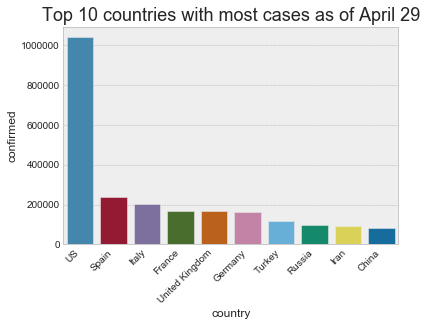

In [91]:
plt.style.use('bmh')
sns.barplot(data = confirmed_by_country_top10
            ,x = 'country'
            ,y = 'confirmed'
        )
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Top 10 countries with most cases as of April 29', fontsize = 18)

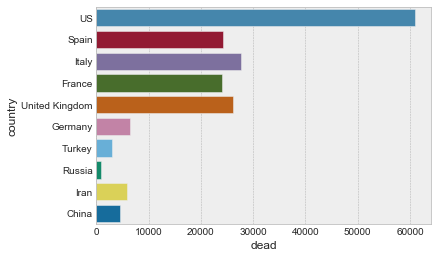

In [92]:
sns.barplot(data = confirmed_by_country_top10
            ,x = 'dead'
            ,y = 'country'
        )

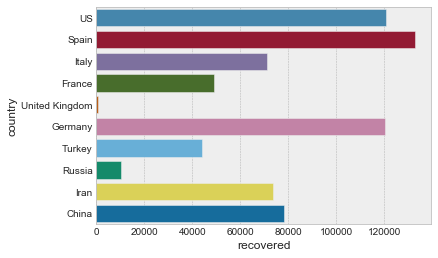

In [93]:
sns.barplot(data = confirmed_by_country_top10
            ,x = 'recovered'
            ,y = 'country'
        )

In [ ]:
plt.style.use('bmh')
sns.barplot(data = confirmed_by_country_top10
            ,x = 'country'
            ,y = 'confirmed'
        )
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Top 10 countries with most cases as of April 29', fontsize = 18)

In [79]:
covid_data_NP = (covid_data.query('country == "Nepal"').reset_index(drop=True)
                 )

In [80]:
covid_data_NP

,country,subregion,date,lat,long,confirmed,dead,recovered,new_cases
0,Nepal,,2020-01-22,28.1667,84.25,0,0,0.0,NaN
1,Nepal,,2020-01-23,28.1667,84.25,0,0,0.0,0.0
2,Nepal,,2020-01-24,28.1667,84.25,0,0,0.0,0.0
3,Nepal,,2020-01-25,28.1667,84.25,1,0,0.0,1.0
4,Nepal,,2020-01-26,28.1667,84.25,1,0,0.0,0.0
5,Nepal,,2020-01-27,28.1667,84.25,1,0,0.0,0.0
6,Nepal,,2020-01-28,28.1667,84.25,1,0,0.0,0.0
7,Nepal,,2020-01-29,28.1667,84.25,1,0,0.0,0.0
8,Nepal,,2020-01-30,28.1667,84.25,1,0,0.0,0.0
9,Nepal,,2020-01-31,28.1667,84.25,1,0,0.0,0.0


Text(0.5, 1.0, 'Covid-19 daily new cases\nin the Nepal as of 29th April')

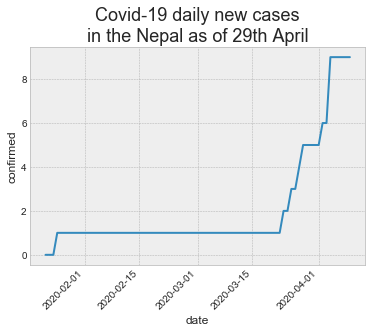

In [88]:
sns.lineplot(data = covid_data_US
             ,x = 'date'
             ,y = 'confirmed'
             
             )
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Covid-19 daily new cases\nin the Nepal as of 29th April', fontsize = 18)